<a href="https://colab.research.google.com/github/ITU-Business-Analytics-Team/Business_Analytics_for_Professionals/blob/main/Part%20II%20%3A%20Business%20Applications/Chapter%2014%3A%20Human%20Resources%20Analytics/14_4_Performance_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Human Resources Analytics**
## Performance Analytics

###**WHO ARE THE BEST PERFORMERS? : IDENTIFYING TOP MANAGER PROFILE THROUGH ANALYTICS**

In this usecase an analytics approach was applied to a assess the profile of top-performer managers using a employee data set. The data set is a modified version of IBM HR Analytics Employee Attrition Data (1) and is available from this [link](https://drive.google.com/file/d/1OM8kgOJ3HQdOtCkjAAsTio-ZPzWQ2Li-/view?usp=sharing).

**Problem Definition** \\
Who are the top performer managers in the company and what are the common characteristics of top performers? 

####**Importing Required Libraries and Components**

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_auc_score,roc_curve

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import lightgbm as lgb

import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
    
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)


#### **Import Data**

In [ ]:
url = "https://drive.google.com/file/d/1OM8kgOJ3HQdOtCkjAAsTio-ZPzWQ2Li-/view?usp=sharing"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path)
df.head()

,Age,TotalExperience,Education,EducationField,OrgFunction,Tenure,TeamAssessment,PerformanceScore
0,45,14,3,Life Sciences,InformationTechnologies,1,0.000000,45.842277
1,51,7,3,Life Sciences,InformationTechnologies,9,0.308065,71.267526
2,33,7,3,Medical,Operations,5,0.308719,37.287667
3,50,18,3,Technical Degree,InformationTechnologies,5,0.360157,25.386199
4,39,11,3,Life Sciences,InformationTechnologies,5,0.396435,19.684497


#### **Identifying Top Performers**

In [ ]:
df.shape

(218, 8)

The data set includes 8 variables of 218 managers in a company. List of variables and their definitions can be seen below:


Variable Name  | Variable Description 
-------------------|------------------
Age       | Age of the manager
TotalExperience       |Total number of years in the work life
Education|Education level of the manager (1: High School,3: Undergraduate, 4:Masters, 5:PhD)
EducationField|Graduation Major of the manager
OrgFunction       |Organizational department of the manager
Tenure|Total years of employment within the company
TeamAssessment|Team Evaluation score of the manager
PerformanceScore|Performance evaluation score of the manager

In order to identify managers best managers within the company, evaluation scores of subordinates and business performance outcomes were analyzed. 

Text(0, 0.5, 'PerformanceScore')

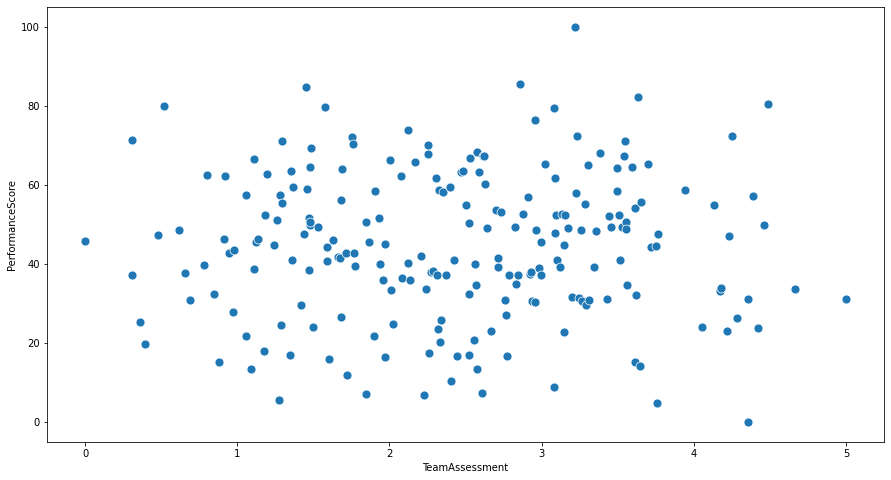

In [ ]:
# Plot performance and team evaluation score for managers 
plt.figure(figsize=(15,8))

sns.scatterplot(data=df, x="TeamAssessment", y="PerformanceScore", palette = "coolwarm_r", s=80)

plt.xlabel("TeamAssessment")
plt.ylabel("PerformanceScore")

In [ ]:
df[["TeamAssessment","PerformanceScore"]].describe()

,TeamAssessment,PerformanceScore
count,218.000000,218.000000
mean,2.434684,44.598742
std,1.038137,18.478257
min,0.000000,0.000000
25%,1.594010,31.760862
50%,2.495315,45.026571
75%,3.211768,58.017369
max,5.000000,100.000000


In [ ]:
df[["TeamAssessment","PerformanceScore"]].corr()

,TeamAssessment,PerformanceScore
TeamAssessment,1.000000,0.008833
PerformanceScore,0.008833,1.000000


Basic descriptive statistics show that, **TeamAsessment** has a mean of **2.24** and **PerformanceScore** has **54.2**

Correlation coefficient between TeamAssessment and Performance Score is -0.0089 which indicates that these two variables are not correlated.

In order to identify the top performer managers, 
* Firstly, managers who has higher performance score than company average were identified.
* Secondly, managers whose team assessment score higher than the company average were selected. 

Text(0, 0.5, 'PerformanceScore')

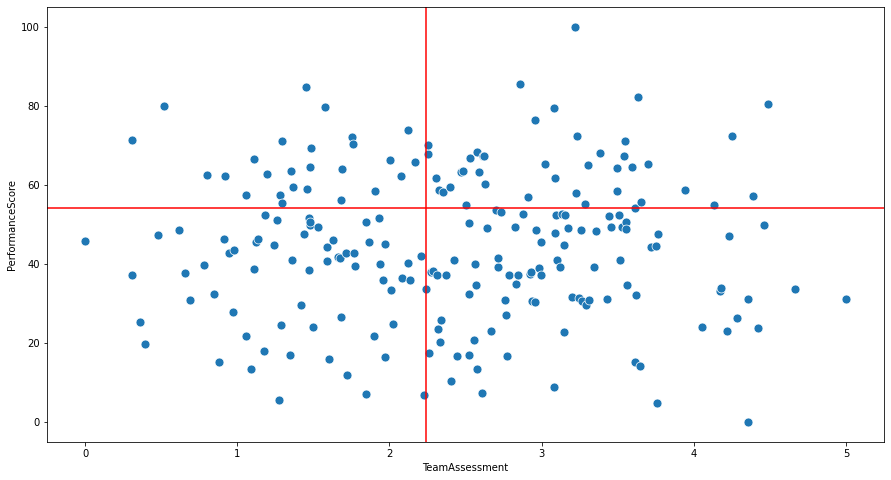

In [ ]:
# Plot performance and team evaluation score for managers to cluster groups

plt.figure(figsize=(15,8))

sns.scatterplot(data=df, x="TeamAssessment", y="PerformanceScore", palette = "coolwarm_r", s=80)

plt.axvline(2.24, 0,color="red")
plt.axhline(54.2, 0,color="red")

plt.xlabel("TeamAssessment")
plt.ylabel("PerformanceScore")




Top right corner of the chart indicate managers who have team asessment and performance scores over the average. 

On the other hand, lower left corner indicates managers with low performance and low team asessment score. 

For the next step, the top performing managers an low performing managers were tagged and their peculiar characteristics were analyzed.  

In [ ]:
df.head()

,Age,TotalExperience,Education,EducationField,OrgFunction,Tenure,TeamAssessment,PerformanceScore
0,45,14,3,Life Sciences,InformationTechnologies,1,0.000000,45.842277
1,51,7,3,Life Sciences,InformationTechnologies,9,0.308065,71.267526
2,33,7,3,Medical,Operations,5,0.308719,37.287667
3,50,18,3,Technical Degree,InformationTechnologies,5,0.360157,25.386199
4,39,11,3,Life Sciences,InformationTechnologies,5,0.396435,19.684497


In [ ]:
# Label Top and Bottom Performance Managers

df['ManagerCluster'] = np.where((df["TeamAssessment"] > df["TeamAssessment"].mean()) & (df["PerformanceScore"] > df["PerformanceScore"].mean()),'Top',"")

df['ManagerCluster'] = np.where((df["TeamAssessment"] < df["TeamAssessment"].mean()) & (df["PerformanceScore"] < df["PerformanceScore"].mean()),'Low',df["ManagerCluster"])




In [ ]:
df["ManagerCluster"].value_counts()

       103
Top     60
Low     55
Name: ManagerCluster, dtype: int64

We can see that there are **60** top performer and **55** Low performer managers. 
Now let's explore the common characteristics of these groups according to their indicative features. 

In [ ]:
df["Education"] = df["Education"].astype(object)

In [ ]:
df[df["ManagerCluster"]=="Top"].describe()

,Age,TotalExperience,Tenure,TeamAssessment,PerformanceScore
count,60.000000,60.000000,60.000000,60.000000,60.000000
mean,37.333333,18.550000,4.783333,3.253362,59.509091
std,8.920870,6.484466,4.186709,0.522977,11.325831
min,24.000000,9.000000,0.000000,2.471734,44.902724
25%,30.000000,13.750000,2.000000,2.870846,50.216389
50%,36.000000,17.000000,3.500000,3.219646,56.207894
75%,43.000000,23.000000,5.000000,3.546695,65.547158
max,59.000000,34.000000,17.000000,4.486392,100.000000


In [ ]:
df[df["ManagerCluster"]=="Low"].describe()

,Age,TotalExperience,Tenure,TeamAssessment,PerformanceScore
count,55.000000,55.000000,55.000000,55.000000,55.000000
mean,41.327273,13.072727,7.363636,1.611660,29.720374
std,8.219342,5.685767,5.268226,0.593338,11.303663
min,28.000000,5.000000,0.000000,0.308719,5.668808
25%,34.000000,9.000000,4.000000,1.144371,20.926706
50%,41.000000,12.000000,6.000000,1.680674,33.520370
75%,46.000000,15.500000,11.500000,2.128867,39.554464
max,60.000000,31.000000,24.000000,2.421970,44.241929


Comparison of basic descriptive statistics of top and low performers show that:
* Top performers average age is lower than top performerns (41.3 to 37.3)
* Top performers have higher total experience average than low performers
* Top performers have a lower tenure than lower performers

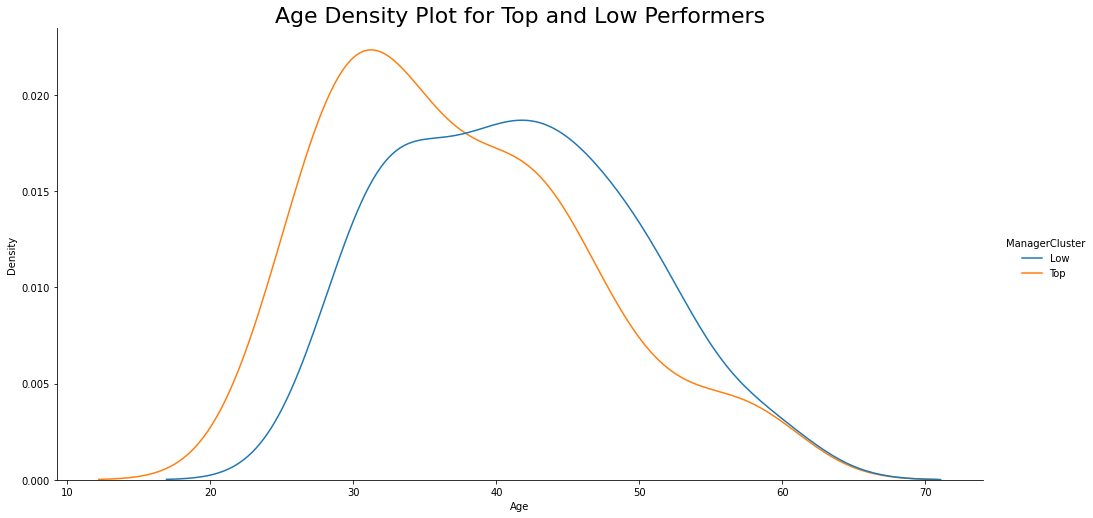

In [ ]:
# DENSITY PLOT FOR AGE

df_filt = df[df["ManagerCluster"] != ""]


# Draw the density plot
sns.displot(x='Age', kind = 'kde',hue="ManagerCluster",label = "ManagerCluster",data=df_filt,
          height= 7, aspect =2,)
    
# Plot formatting

plt.title('Age Density Plot for Top and Low Performers',size=22)
plt.xlabel('Age')
plt.ylabel('Density')

plt.show()


Density plot of the **Age** for top and low perfomers show that there are more managers who are below 40 in top performer segment. 
On the contrary, there are more low performer managers older than 40.  

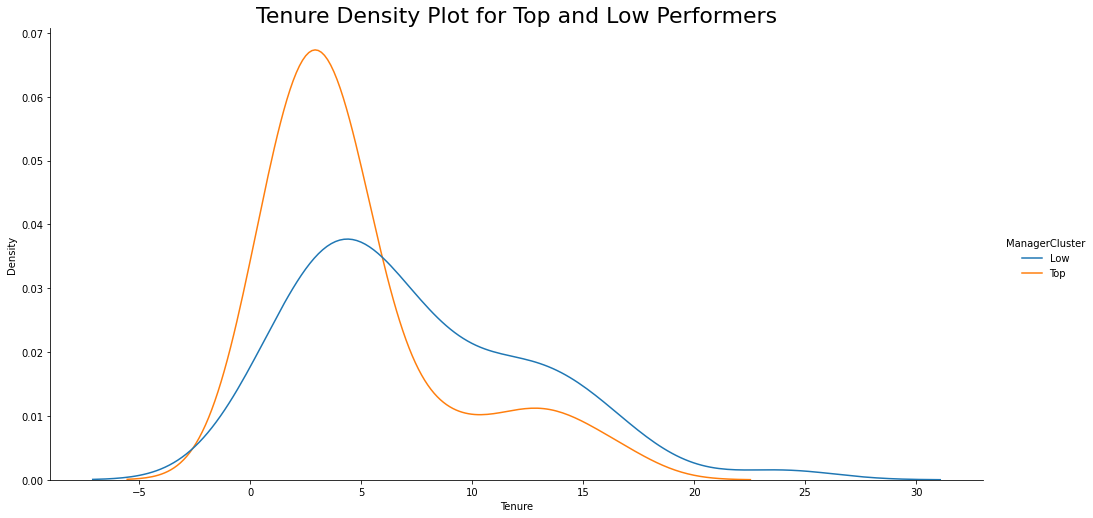

In [ ]:
# DENSITY PLOT FOR TENURE

df_filt = df[df["ManagerCluster"] != ""]


# Draw the density plot
sns.displot(x='Tenure', kind = 'kde',hue="ManagerCluster",label = "ManagerCluster",data=df_filt,
          height= 7, aspect =2,)
    
# Plot formatting

plt.title('Tenure Density Plot for Top and Low Performers',size=22)
plt.xlabel('Tenure')
plt.ylabel('Density')

plt.show()



Density plot of tenure, show that: 
* There are more top performers who have tenure less than 5
* On the contrary there are more low performer managers who have a tenure more than 5

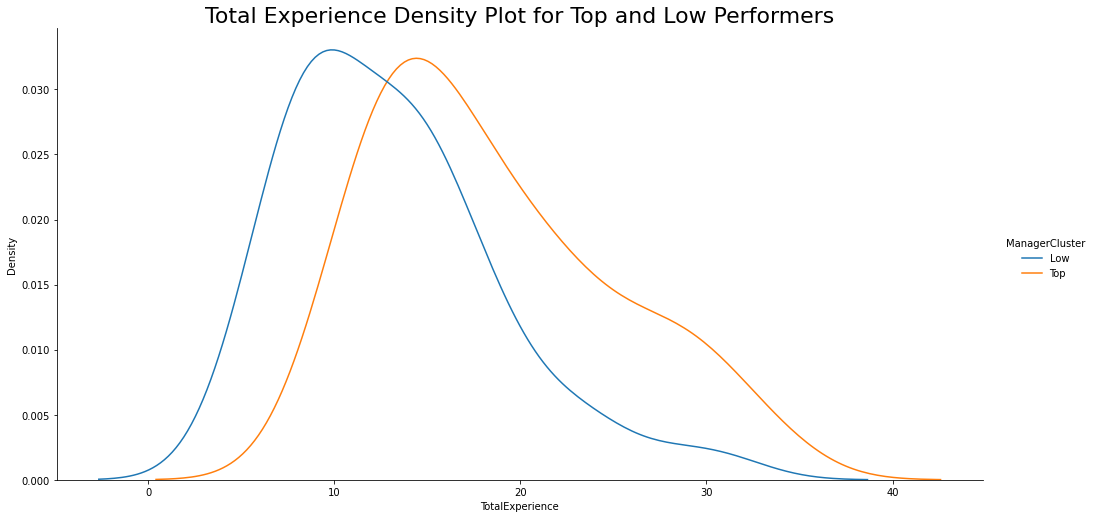

In [ ]:
# DENSITY PLOT FOR TOTAL EXPERIENCE

df_filt = df[df["ManagerCluster"] != ""]


# Draw the density plot
sns.displot(x='TotalExperience', kind = 'kde',hue="ManagerCluster",label = "ManagerCluster",data=df_filt,
          height= 7, aspect =2,)
    
# Plot formatting

plt.title('Total Experience Density Plot for Top and Low Performers',size=22)
plt.xlabel('TotalExperience')
plt.ylabel('Density')

plt.show()


Even though distributions of top and low performers in terms of total experience are similiar, there are more top performers who have total experience more than 15.

In [ ]:
df_filt.head()

,Age,TotalExperience,Education,EducationField,OrgFunction,Tenure,TeamAssessment,PerformanceScore,ManagerCluster
2,33,7,3,Medical,Operations,5,0.308719,37.287667,Low
3,50,18,3,Technical Degree,InformationTechnologies,5,0.360157,25.386199,Low
4,39,11,3,Life Sciences,InformationTechnologies,5,0.396435,19.684497,Low
8,45,8,3,Marketing,Operations,9,0.655314,37.605066,Low
9,50,23,1,Life Sciences,InformationTechnologies,24,0.688052,30.981895,Low


ManagerCluster  Education
Low             1            12.7
                3            63.6
                4            18.2
                5             5.5
Top             1             6.7
                3            61.7
                4            30.0
                5             1.7
Name: Age, dtype: float64


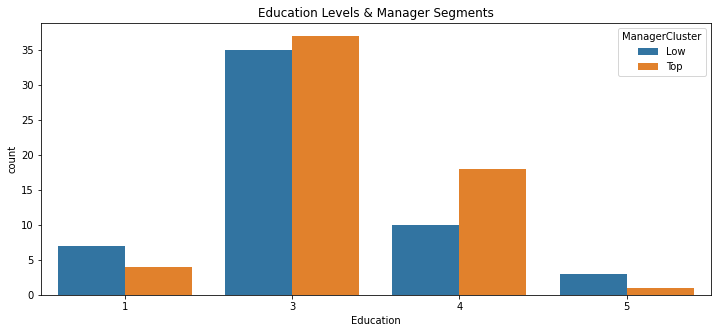

In [ ]:
# COMPARE EDUCATION DEGREE OF TOP AND LOW PERFORMERS

cluster_level = df_filt.groupby(["ManagerCluster", "Education"])["Age"].count()
cluster_percent = (cluster_level / cluster_level.groupby(level=0).sum()*100).round(1)
print(cluster_percent)

plt.figure(figsize=(12,5))
sns.countplot(x="Education", hue="ManagerCluster",data = df_filt)
plt.title('Education Levels & Manager Segments')
plt.show()

When we compare the top and low performers education level, we can see that, number of top performers who have a Masters degree is more than the low performers. 
On the contrary, number low performers who have a high school degree is higher than the top performers.

ManagerCluster  EducationField  
Low             Life Sciences       54.5
                Marketing           14.5
                Medical             16.4
                Other                1.8
                Technical Degree    12.7
Top             Human Resources      1.7
                Life Sciences        8.3
                Marketing           25.0
                Medical             11.7
                Other                3.3
                Technical Degree    50.0
Name: Age, dtype: float64


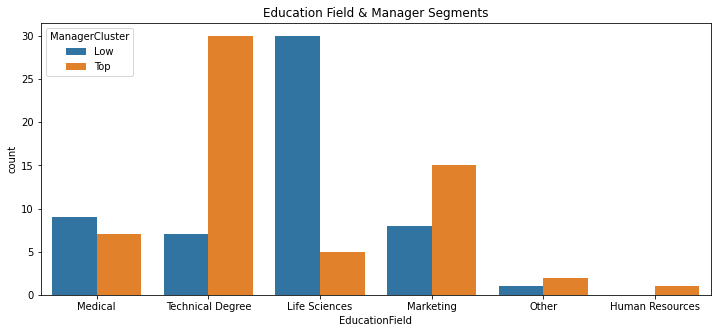

In [ ]:
# COMPARE EDUCATION FIELD OF TOP AND LOW PERFORMERS

cluster_level = df_filt.groupby(["ManagerCluster", "EducationField"])["Age"].count()
cluster_percent = (cluster_level / cluster_level.groupby(level=0).sum()*100).round(1)
print(cluster_percent)

plt.figure(figsize=(12,5))
sns.countplot(x="EducationField", hue="ManagerCluster",data = df_filt)
plt.title('Education Field & Manager Segments')
plt.show()

Analysis of education field mark a considerable difference between technical degree and life sciences graduates. 
* Number of top performers with technical degree are much more higher than the low performers. 
* On the contrary, number of low performers with life sciences degree are much more higher than the top performers. 

ManagerCluster  OrgFunction            
Low             Finance                     1.8
                InformationTechnologies    58.2
                Operations                 40.0
Top             Finance                     1.7
                InformationTechnologies    68.3
                Operations                 30.0
Name: Age, dtype: float64


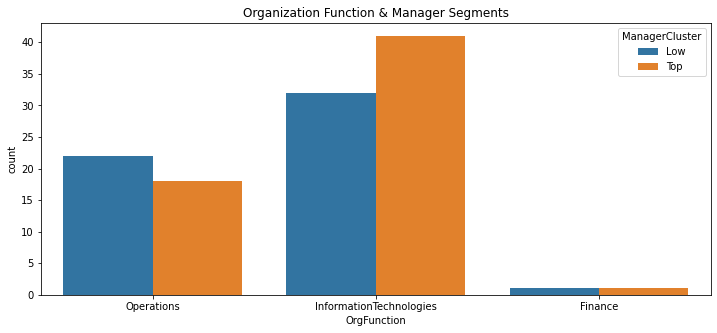

In [ ]:
# COMPARE ORGFUNCTION  OF TOP AND LOW PERFORMERS

cluster_level = df_filt.groupby(["ManagerCluster", "OrgFunction"])["Age"].count()
cluster_percent = (cluster_level / cluster_level.groupby(level=0).sum()*100).round(1)
print(cluster_percent)

plt.figure(figsize=(12,5))
sns.countplot(x="OrgFunction", hue="ManagerCluster",data = df_filt)
plt.title('Organization Function & Manager Segments')
plt.show()

When we compare the number top and low performers in different organizational departments, we can see that number of top performers are slightly higher in Information Technologies and lower in Operations.

In [ ]:
# COMPARE EDUCATION FIELD OF TOP AND LOW PERFORMERS

cluster_level = df_filt.groupby(["ManagerCluster", "OrgFunction", "EducationField"])["Age"].count()
cluster_percent = (cluster_level / cluster_level.groupby(level=0).sum()*100).round(1)
print(cluster_percent)


ManagerCluster  OrgFunction              EducationField  
Low             Finance                  Medical              1.8
                InformationTechnologies  Life Sciences       38.2
                                         Medical              5.5
                                         Other                1.8
                                         Technical Degree    12.7
                Operations               Life Sciences       16.4
                                         Marketing           14.5
                                         Medical              9.1
Top             Finance                  Human Resources      1.7
                InformationTechnologies  Life Sciences        6.7
                                         Medical              8.3
                                         Other                3.3
                                         Technical Degree    50.0
                Operations               Life Sciences        1.7
                  

When we compare the education field for top and low performers in different organizations we can see that technical degree dominate in Information Technologies, Marketing in Operations department. 

To sum up we can say that the common characteristics of the top performers are: 

* Are below 40
* Have a tenure less than 5
* Have a total experience more than 10
* Have a technical degree in IT and marketing in operations. 


# **REFERENCES**

(1) https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset